In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Для начала, давайте посмотрим на распределение посещений сайта по дням. 
# Построим график с распределением количества посещений от ботов 
# и обычных пользователей сайта Яндекс.Метрика.

In [21]:
sns.set(
    font_scale =2, 
    style      ='whitegrid', 
    rc         ={'figure.figsize':(20,7)})
# здесь мы делаем настройки графиков , для читабельности
# с помощью библиотеки seaborn, set метод

In [15]:
df = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/7_lesson_data.csv')

In [16]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [17]:
df.dtypes

date          object
user_type     object
visits       float64
dtype: object

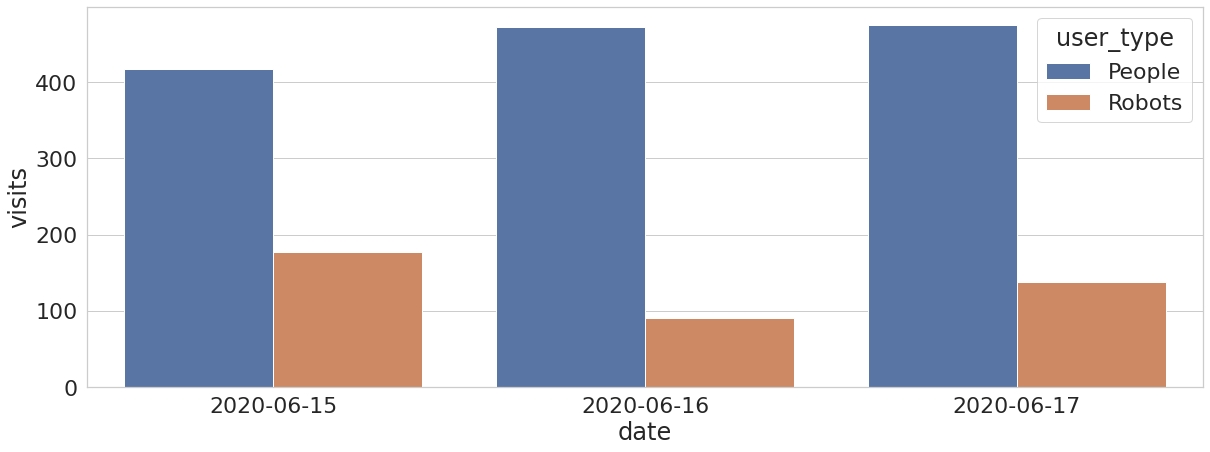

In [22]:
sns.barplot(data=df, x='date', y='visits', hue='user_type')

In [23]:
# Определим процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [24]:
step_2 = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/7_lesson_step_2.csv')

In [25]:
step_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [31]:
step_2.visits.sum()

594.0

In [45]:
step_2.query('browser == "Google Chrome"').visits / step_2.visits.sum() * 100

0    59.59596
Name: visits, dtype: float64

In [36]:
# Давайте выясним, с какого браузера приходит больше всего ботов. 
# Посмотрим на данные и определим, у какого браузера самая большая доля 
# посещений сайта ботами от общего числа посещений в этом браузере?

In [46]:
step_3 = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/7_lesson_step_3.csv')

In [55]:
step_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [61]:
 temp_df = step_3.groupby(['browser', 'user_type']) \
    .agg({'visits': 'sum'}) \
    .reset_index() \
    .pivot(index='browser', values='visits', columns='user_type') \
    .fillna(0)
temp_df    

user_type,People,Robots
browser,,
Android Browser,1.0,0.0
Chrome Mobile,31.0,0.0
Chromium,1.0,1.0
CocCoc,1.0,0.0
Edge,4.0,1.0
Firefox,27.0,31.0
Google Chrome,250.0,104.0
Mobile Safari,15.0,1.0
Opera,11.0,5.0


In [69]:
(temp_df.Robots / (temp_df.People + temp_df.Robots) ).sort_values(ascending=False)

browser
UCWEB                 1.000000
Safari                0.536585
Firefox               0.534483
Chromium              0.500000
Opera                 0.312500
Google Chrome         0.293785
Edge                  0.200000
Yandex Browser        0.129630
Samsung Internet      0.111111
Mobile Safari         0.062500
Yandex: mobile app    0.000000
Vivaldi               0.000000
CocCoc                0.000000
Chrome Mobile         0.000000
Android Browser       0.000000
dtype: float64

In [70]:
# Выгрузим данные, содержащие информацию о дне, типе пользователя, браузере. 
# Создадим колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

# Укажем процент открытий сайта настоящими пользователями Safari (не ботами)

In [72]:
step_4 = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/7_lesson_step_4.csv')

In [73]:
step_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [75]:
all_visits = step_4.visits.sum()

In [80]:
visits_by_user = step_4.groupby(['browser', 'user_type']) \
    .agg({'visits': 'sum'}) \
    .reset_index()
visits_by_user.head()

,browser,user_type,visits
0,Android Browser,People,1.0
1,Chrome Mobile,People,31.0
2,Chromium,People,1.0
3,Chromium,Robots,1.0
4,CocCoc,People,1.0


In [94]:
visits_by_user['ctr'] = (visits_by_user.visits / all_visits * 100)

In [95]:
visits_by_user['ctr'] = visits_by_user.ctr.round(1) 

In [103]:
visits_by_user.query('user_type == "People" & browser == "Safari"')

,browser,user_type,visits,ctr
15,Safari,People,19.0,3.2


In [109]:
# При помощи библиотеки gspread отправим данные из предыдущего шага в Google SpreadSheet.
# Далее отправьте ссылку на получившийся файл в Google SpreadSheet 
# при помощи VK API себе в личку ВКонтакте. 

In [110]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [111]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'ebnbobn@ebnbobntest.iam.gserviceaccount.com'
path_to_credentials = '/home/jupyter-n-demidov-20/TASKS_BY_LESSONS/ebnbobntest-886a888ff086.json'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

In [112]:
gs

In [113]:
table_name = 'some_test'

In [116]:
gs.create(table_name)
table = gs.open(table_name)

In [117]:
table.share(my_mail, perm_type='user', role='writer')

In [118]:
sheet_name = 'list1'

In [ ]:
d2g.upload

In [107]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df_1 = pd.read_csv(BytesIO(data))

In [108]:
df_1

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [119]:
step_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [120]:
df_1.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [121]:
final_df = step_4.merge(df_1, on=['date', 'browser', 'user_type'])

In [124]:
final_df['visits/users'] = final_df.visits / final_df.users
final_df

,date,browser,user_type,visits,users,visits/users
0,2020-06-15,Google Chrome,People,250.0,240.0,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.000000
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.068182
3,2020-06-15,Firefox,Robots,31.0,29.0,1.068966
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.033333
5,2020-06-15,Firefox,People,27.0,26.0,1.038462
6,2020-06-15,Safari,Robots,22.0,20.0,1.100000
7,2020-06-15,Safari,People,19.0,17.0,1.117647
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.071429
9,2020-06-15,Opera,People,11.0,10.0,1.100000
